In [35]:
import pandas as pd
df = pd.read_excel('Omni_combined_인코딩.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      2704 non-null   object 
 1   Ad creative image URL        2699 non-null   object 
 2   Omni purchases               2704 non-null   int64  
 3   Return on ad spend (ROAS)    2668 non-null   float64
 4   Website checkouts initiated  2704 non-null   int64  
 5   Omni adds to cart            2704 non-null   int64  
 6   Amount spent                 2704 non-null   int64  
 7   Clicks (all)                 2704 non-null   int64  
 8   Amount spent.1               2704 non-null   int64  
 9   YYYYMM                       2704 non-null   int64  
 10  Data_Type                    2704 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 232.5+ KB


In [36]:
df.corr()

C:\Users\k6304\AppData\Local\Temp\ipykernel_15960\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Omni purchases,Return on ad spend (ROAS),Website checkouts initiated,Omni adds to cart,Amount spent,Clicks (all),Amount spent.1,YYYYMM
Omni purchases,1.000000,0.060856,0.991962,0.831651,0.980264,0.874843,0.980264,-0.023815
Return on ad spend (ROAS),0.060856,1.000000,0.055840,0.049745,0.041550,0.033425,0.041550,-0.026489
Website checkouts initiated,0.991962,0.055840,1.000000,0.852292,0.975953,0.891402,0.975953,-0.024025
Omni adds to cart,0.831651,0.049745,0.852292,1.000000,0.849175,0.800301,0.849175,0.088299
Amount spent,0.980264,0.041550,0.975953,0.849175,1.000000,0.908107,1.000000,-0.009675
Clicks (all),0.874843,0.033425,0.891402,0.800301,0.908107,1.000000,0.908107,-0.033779
Amount spent.1,0.980264,0.041550,0.975953,0.849175,1.000000,0.908107,1.000000,-0.009675
YYYYMM,-0.023815,-0.026489,-0.024025,0.088299,-0.009675,-0.033779,-0.009675,1.000000


In [3]:
df['Omni purchases'].describe()

count    2704.000000
mean        3.780695
std        16.432498
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       330.000000
Name: Omni purchases, dtype: float64

In [4]:
df['Amount spent'].describe()

count    2.704000e+03
mean     7.707379e+04
std      2.991875e+05
min      0.000000e+00
25%      5.405000e+02
50%      3.199000e+03
75%      2.241425e+04
max      5.940319e+06
Name: Amount spent, dtype: float64

# 전체 데이터로

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

# 피처와 타겟 변수 분리
X_ad = df['Amount spent'].values.reshape(-1, 1)
y_ad = df['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 평가
mae = mean_absolute_error(y_test_ad, y_pred_ad)
mse = mean_squared_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_ad, y_pred_ad)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 1.0207325847295758
MSE: 5.772832241416755
RMSE: 2.4026718963305735
R^2: 0.9828467294738304


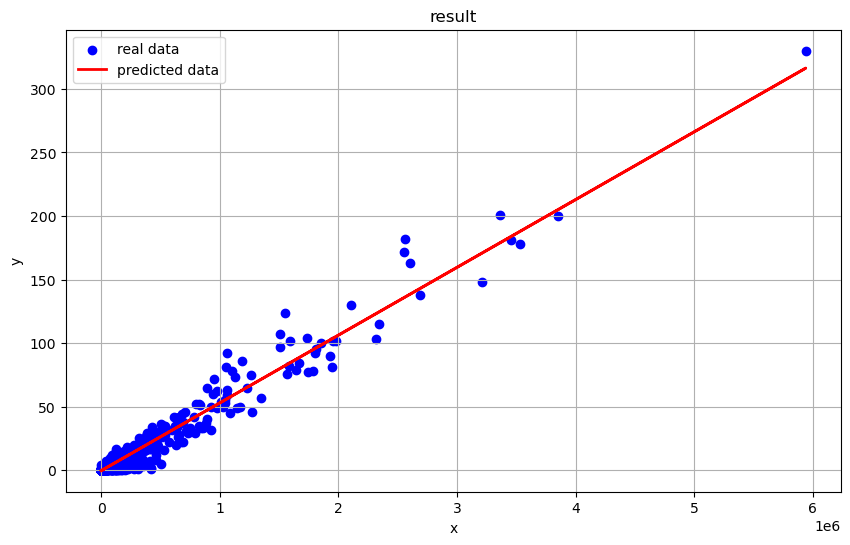

In [14]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad, color='blue', label='real data')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='predicted data')
plt.title('result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# 모델의 계수와 절편 확인
coef = model.coef_[0][0]  # 모델의 계수 (기울기)
intercept = model.intercept_[0]  # 모델의 절편

# 예측된 선의 식 출력
print(f'예측된 선의 식: y = {coef}x + {intercept:.2f}')

예측된 선의 식: y = 5.330902864678604e-05x + -0.38


# max 값 하나 제거한 데이터로

In [80]:
df = pd.read_excel('Omni_combined_인코딩.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      2704 non-null   object 
 1   Ad creative image URL        2699 non-null   object 
 2   Omni purchases               2704 non-null   int64  
 3   Return on ad spend (ROAS)    2668 non-null   float64
 4   Website checkouts initiated  2704 non-null   int64  
 5   Omni adds to cart            2704 non-null   int64  
 6   Amount spent                 2704 non-null   int64  
 7   Clicks (all)                 2704 non-null   int64  
 8   Amount spent.1               2704 non-null   int64  
 9   YYYYMM                       2704 non-null   int64  
 10  Data_Type                    2704 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 232.5+ KB


In [81]:
df = df[df['Amount spent'] != 5.940319e+06]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      2703 non-null   object 
 1   Ad creative image URL        2698 non-null   object 
 2   Omni purchases               2703 non-null   int64  
 3   Return on ad spend (ROAS)    2667 non-null   float64
 4   Website checkouts initiated  2703 non-null   int64  
 5   Omni adds to cart            2703 non-null   int64  
 6   Amount spent                 2703 non-null   int64  
 7   Clicks (all)                 2703 non-null   int64  
 8   Amount spent.1               2703 non-null   int64  
 9   YYYYMM                       2703 non-null   int64  
 10  Data_Type                    2703 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 253.4+ KB


In [82]:
df['Omni purchases'].describe()

count    2703.000000
mean        3.660007
std        15.189703
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       201.000000
Name: Omni purchases, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

# 피처와 타겟 변수 분리
X_ad = df['Amount spent'].values.reshape(-1, 1)
y_ad = df['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 평가
mae = mean_absolute_error(y_test_ad, y_pred_ad)
mse = mean_squared_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_ad, y_pred_ad)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 1.2108661213583227
MSE: 10.970291115231511
RMSE: 3.3121429792856936
R^2: 0.9569821099858407


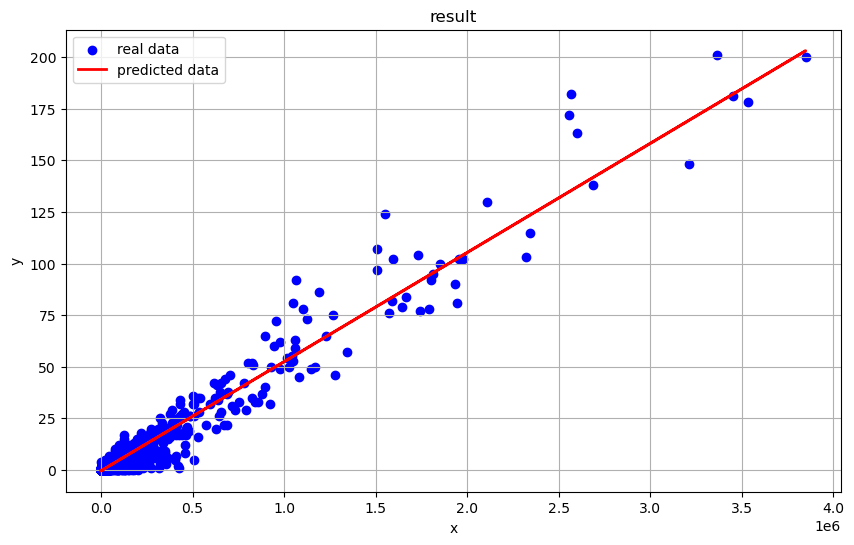

In [19]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad, color='blue', label='real data')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='predicted data')
plt.title('result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# 모델의 계수와 절편 확인
coef = model.coef_[0][0]  # 모델의 계수 (기울기)
intercept = model.intercept_[0]  # 모델의 절편

# 예측된 선의 식 출력
print(f'예측된 선의 식: y = {coef}x + {intercept:.2f}')

예측된 선의 식: y = 5.285847811706011e-05x + -0.35


# IQR로 이상치 제거한 데이터로

In [33]:
df = pd.read_excel('Omni_combined_인코딩.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      2704 non-null   object 
 1   Ad creative image URL        2699 non-null   object 
 2   Omni purchases               2704 non-null   int64  
 3   Return on ad spend (ROAS)    2668 non-null   float64
 4   Website checkouts initiated  2704 non-null   int64  
 5   Omni adds to cart            2704 non-null   int64  
 6   Amount spent                 2704 non-null   int64  
 7   Clicks (all)                 2704 non-null   int64  
 8   Amount spent.1               2704 non-null   int64  
 9   YYYYMM                       2704 non-null   int64  
 10  Data_Type                    2704 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 232.5+ KB


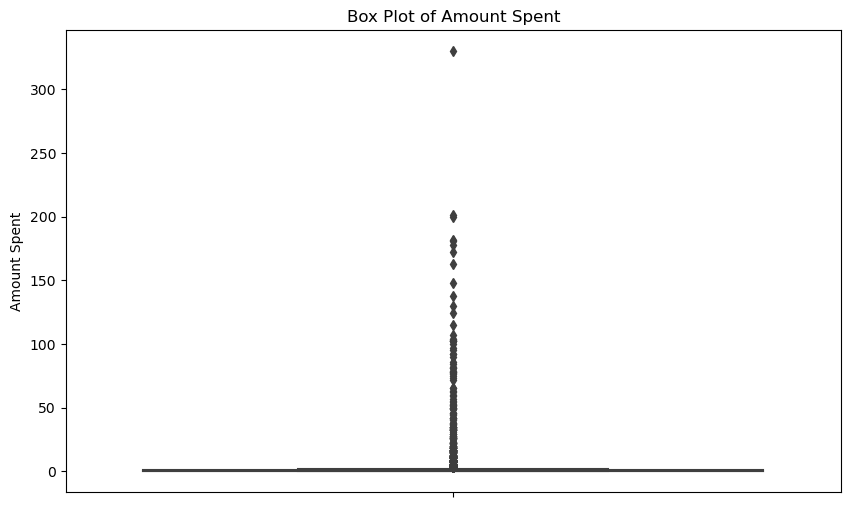

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Omni purchases'])
plt.title('Box Plot of Amount Spent')
plt.ylabel('Amount Spent')
plt.show()

In [28]:
# IQR 계산
Q1 = df['Omni purchases'].quantile(0.25)
Q3 = df['Omni purchases'].quantile(0.75)
IQR = Q3 - Q1

# IQR을 이용해 이상치 제거
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Omni purchases'] >= lower_bound) & (df['Omni purchases'] <= upper_bound)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 14 to 2703
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      2254 non-null   object 
 1   Ad creative image URL        2251 non-null   object 
 2   Omni purchases               2254 non-null   int64  
 3   Return on ad spend (ROAS)    2218 non-null   float64
 4   Website checkouts initiated  2254 non-null   int64  
 5   Omni adds to cart            2254 non-null   int64  
 6   Amount spent                 2254 non-null   int64  
 7   Clicks (all)                 2254 non-null   int64  
 8   Amount spent.1               2254 non-null   int64  
 9   YYYYMM                       2254 non-null   int64  
 10  Data_Type                    2254 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 211.3+ KB


In [29]:
df['Omni purchases'].describe()

count    2254.000000
mean        0.194765
std         0.493859
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Omni purchases, dtype: float64

In [30]:
# 피처와 타겟 변수 분리
X_ad = df['Amount spent'].values.reshape(-1, 1)
y_ad = df['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 평가
mae = mean_absolute_error(y_test_ad, y_pred_ad)
mse = mean_squared_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_ad, y_pred_ad)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 0.2823877488541754
MSE: 0.1936279589684039
RMSE: 0.4400317704080058
R^2: 0.1339200316195559


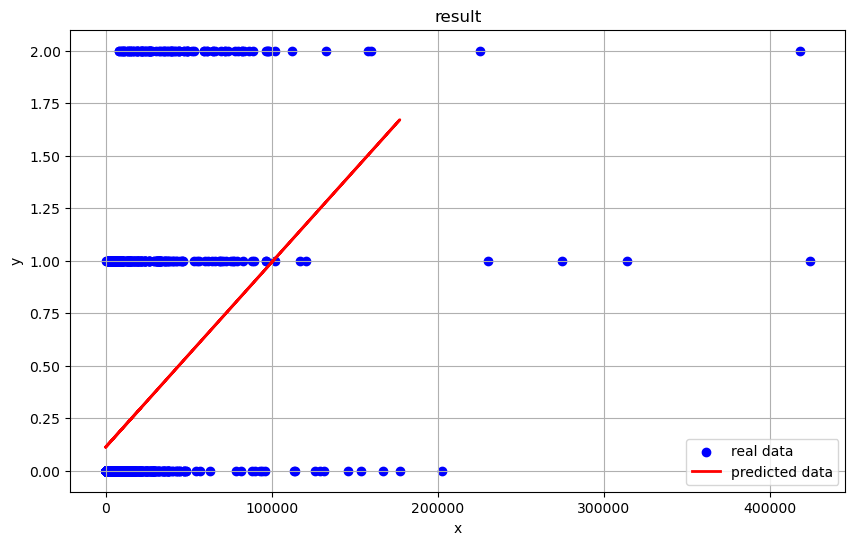

In [31]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad, color='blue', label='real data')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='predicted data')
plt.title('result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# 표준화를 이용한 이상치 제거 (Amount spent만)

In [38]:
df = pd.read_excel('Omni_combined_인코딩.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      2704 non-null   object 
 1   Ad creative image URL        2699 non-null   object 
 2   Omni purchases               2704 non-null   int64  
 3   Return on ad spend (ROAS)    2668 non-null   float64
 4   Website checkouts initiated  2704 non-null   int64  
 5   Omni adds to cart            2704 non-null   int64  
 6   Amount spent                 2704 non-null   int64  
 7   Clicks (all)                 2704 non-null   int64  
 8   Amount spent.1               2704 non-null   int64  
 9   YYYYMM                       2704 non-null   int64  
 10  Data_Type                    2704 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 232.5+ KB


In [39]:
# 평균과 표준편차 계산
mean = df['Amount spent'].mean()
std = df['Amount spent'].std()

# 표준 편차를 이용해 이상치 제거 (여기서는 평균으로부터 3 표준편차 이상을 이상치로 간주)
df = df[(df['Amount spent'] >= mean - 3 * std) & (df['Amount spent'] <= mean + 3 * std)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2654 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      2654 non-null   object 
 1   Ad creative image URL        2649 non-null   object 
 2   Omni purchases               2654 non-null   int64  
 3   Return on ad spend (ROAS)    2618 non-null   float64
 4   Website checkouts initiated  2654 non-null   int64  
 5   Omni adds to cart            2654 non-null   int64  
 6   Amount spent                 2654 non-null   int64  
 7   Clicks (all)                 2654 non-null   int64  
 8   Amount spent.1               2654 non-null   int64  
 9   YYYYMM                       2654 non-null   int64  
 10  Data_Type                    2654 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 248.8+ KB


In [41]:
df['Omni purchases'].describe()

count    2654.000000
mean        1.928033
std         6.053576
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        72.000000
Name: Omni purchases, dtype: float64

In [40]:
# 피처와 타겟 변수 분리
X_ad = df['Amount spent'].values.reshape(-1, 1)
y_ad = df['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 평가
mae = mean_absolute_error(y_test_ad, y_pred_ad)
mse = mean_squared_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_ad, y_pred_ad)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 0.8584994931107491
MSE: 4.332878960325141
RMSE: 2.0815568597386767
R^2: 0.8130706008300587


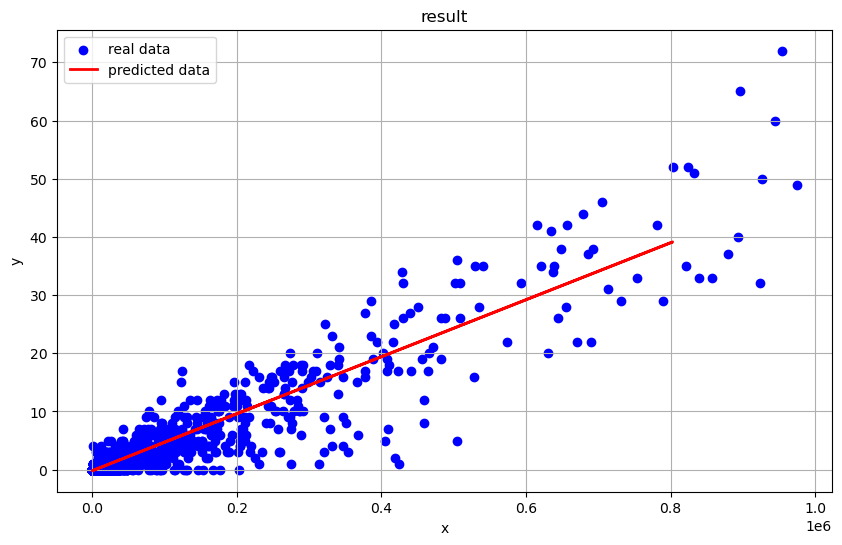

In [42]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad, color='blue', label='real data')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='predicted data')
plt.title('result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# 모델의 계수와 절편 확인
coef = model.coef_[0][0]  # 모델의 계수 (기울기)
intercept = model.intercept_[0]  # 모델의 절편

# 예측된 선의 식 출력
print(f'예측된 선의 식: y = {coef}x + {intercept:.2f}')

예측된 선의 식: y = 4.898164235267624e-05x + -0.19


# 표준화를 이용한 이상치 제거 (Omni purchases만)

In [46]:
df = pd.read_excel('Omni_combined_인코딩.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      2704 non-null   object 
 1   Ad creative image URL        2699 non-null   object 
 2   Omni purchases               2704 non-null   int64  
 3   Return on ad spend (ROAS)    2668 non-null   float64
 4   Website checkouts initiated  2704 non-null   int64  
 5   Omni adds to cart            2704 non-null   int64  
 6   Amount spent                 2704 non-null   int64  
 7   Clicks (all)                 2704 non-null   int64  
 8   Amount spent.1               2704 non-null   int64  
 9   YYYYMM                       2704 non-null   int64  
 10  Data_Type                    2704 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 232.5+ KB


In [47]:
# 평균과 표준편차 계산
mean = df['Omni purchases'].mean()
std = df['Omni purchases'].std()

# 표준 편차를 이용해 이상치 제거 (여기서는 평균으로부터 3 표준편차 이상을 이상치로 간주)
df = df[(df['Omni purchases'] >= mean - 3 * std) & (df['Omni purchases'] <= mean + 3 * std)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2657 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      2657 non-null   object 
 1   Ad creative image URL        2652 non-null   object 
 2   Omni purchases               2657 non-null   int64  
 3   Return on ad spend (ROAS)    2621 non-null   float64
 4   Website checkouts initiated  2657 non-null   int64  
 5   Omni adds to cart            2657 non-null   int64  
 6   Amount spent                 2657 non-null   int64  
 7   Clicks (all)                 2657 non-null   int64  
 8   Amount spent.1               2657 non-null   int64  
 9   YYYYMM                       2657 non-null   int64  
 10  Data_Type                    2657 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 249.1+ KB


In [48]:
df['Omni purchases'].describe()

count    2657.000000
mean        1.961987
std         6.080570
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        53.000000
Name: Omni purchases, dtype: float64

In [49]:
# 피처와 타겟 변수 분리
X_ad = df['Amount spent'].values.reshape(-1, 1)
y_ad = df['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 평가
mae = mean_absolute_error(y_test_ad, y_pred_ad)
mse = mean_squared_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_ad, y_pred_ad)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 0.8614182361598605
MSE: 4.967423676554128
RMSE: 2.2287717865573695
R^2: 0.8292249519059102


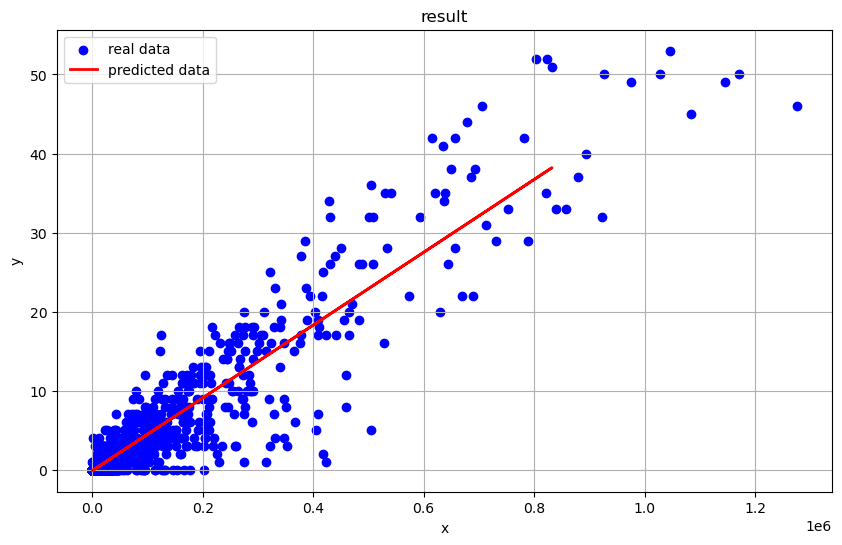

In [50]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad, color='blue', label='real data')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='predicted data')
plt.title('result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# 모델의 계수와 절편 확인
coef = model.coef_[0][0]  # 모델의 계수 (기울기)
intercept = model.intercept_[0]  # 모델의 절편

# 예측된 선의 식 출력
print(f'예측된 선의 식: y = {coef}x + {intercept:.2f}')

예측된 선의 식: y = 4.6039823670172524e-05x + -0.11


# 표준화를 이용한 이상치 제거 (Amount spent, Omni purchases 둘다)
- 일반적으로 평균에서 3 표준 편차 이상 떨어진 값을 이상치로 정의
- 이는 정규 분포를 따르는 데이터에서 약 99.7%가 평균으로부터 3 표준 편차 이내에 위치하기 때문
    - Amount spent 98.15%
    - Omni purchases 98.26%
    - 즉, Amount spent는 98.15%가 Omni purchases는 98.26%가 평균으로부터 3 표준 편차 이내 존재하므로 표준화를 이용한 이상치 제거 방법을 써도 된다고 판단
- 하한: 평균 - 3 * 표준 편차
- 상한: 평균 + 3 * 표준 편차

In [90]:
df = pd.read_excel('Omni_combined_인코딩.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      2704 non-null   object 
 1   Ad creative image URL        2699 non-null   object 
 2   Omni purchases               2704 non-null   int64  
 3   Return on ad spend (ROAS)    2668 non-null   float64
 4   Website checkouts initiated  2704 non-null   int64  
 5   Omni adds to cart            2704 non-null   int64  
 6   Amount spent                 2704 non-null   int64  
 7   Clicks (all)                 2704 non-null   int64  
 8   Amount spent.1               2704 non-null   int64  
 9   YYYYMM                       2704 non-null   int64  
 10  Data_Type                    2704 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 232.5+ KB


In [91]:
# x와 y의 평균과 표준 편차 계산
mean_x = df['Amount spent'].mean()
std_x = df['Amount spent'].std()
mean_y = df['Omni purchases'].mean()
std_y = df['Omni purchases'].std()

# x와 y의 이상치 경계 계산 (3 표준 편차 사용)
lower_bound_x = mean_x - 3 * std_x
upper_bound_x = mean_x + 3 * std_x
lower_bound_y = mean_y - 3 * std_y
upper_bound_y = mean_y + 3 * std_y

# x와 y 모두에서 이상치가 아닌 값 선택
df_re = df[(df['Amount spent'] >= lower_bound_x) & (df['Amount spent'] <= upper_bound_x) &
                 (df['Omni purchases'] >= lower_bound_y) & (df['Omni purchases'] <= upper_bound_y)]

In [92]:
# x와 y의 이상치가 아닌 값의 비율 계산
within_bounds_x = df[(df['Amount spent'] >= lower_bound_x) & (df['Amount spent'] <= upper_bound_x)]
within_bounds_y = df[(df['Omni purchases'] >= lower_bound_y) & (df['Omni purchases'] <= upper_bound_y)]

# 비율 계산
proportion_x = len(within_bounds_x) / len(df)
proportion_y = len(within_bounds_y) / len(df)

print("Proportion of 'Amount spent' within 3 standard deviations:", proportion_x)
print("Proportion of 'Omni purchases' within 3 standard deviations:", proportion_y)

Proportion of 'Amount spent' within 3 standard deviations: 0.981508875739645
Proportion of 'Omni purchases' within 3 standard deviations: 0.9826183431952663


In [93]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2651 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      2651 non-null   object 
 1   Ad creative image URL        2646 non-null   object 
 2   Omni purchases               2651 non-null   int64  
 3   Return on ad spend (ROAS)    2615 non-null   float64
 4   Website checkouts initiated  2651 non-null   int64  
 5   Omni adds to cart            2651 non-null   int64  
 6   Amount spent                 2651 non-null   int64  
 7   Clicks (all)                 2651 non-null   int64  
 8   Amount spent.1               2651 non-null   int64  
 9   YYYYMM                       2651 non-null   int64  
 10  Data_Type                    2651 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 248.5+ KB


In [94]:
# 피처와 타겟 변수 분리
X_ad = df_re['Amount spent'].values.reshape(-1, 1)
y_ad = df_re['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 평가
mae = mean_absolute_error(y_test_ad, y_pred_ad)
mse = mean_squared_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_ad, y_pred_ad)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 0.8535680930594287
MSE: 4.512591132686013
RMSE: 2.124286028925016
R^2: 0.8498333064210543


In [95]:
df_re['Omni purchases'].describe()

count    2651.000000
mean        1.855903
std         5.661754
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        52.000000
Name: Omni purchases, dtype: float64

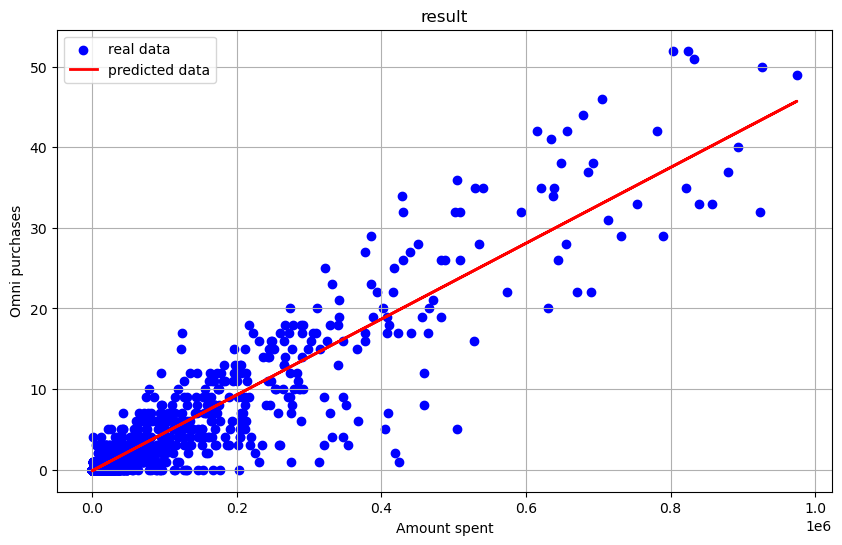

In [96]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad, color='blue', label='real data')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='predicted data')
plt.title('result')
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
# 모델의 계수와 절편 확인
coef = model.coef_[0][0]  # 모델의 계수 (기울기)
intercept = model.intercept_[0]  # 모델의 절편

# 예측된 선의 식 출력
print(f'예측된 선의 식: y = {coef}x + {intercept:.2f}')

예측된 선의 식: y = 4.7069528981992445e-05x + -0.14


# 구매 수가 0인 거 제외

In [84]:
df = pd.read_excel('Omni_combined_인코딩.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      2704 non-null   object 
 1   Ad creative image URL        2699 non-null   object 
 2   Omni purchases               2704 non-null   int64  
 3   Return on ad spend (ROAS)    2668 non-null   float64
 4   Website checkouts initiated  2704 non-null   int64  
 5   Omni adds to cart            2704 non-null   int64  
 6   Amount spent                 2704 non-null   int64  
 7   Clicks (all)                 2704 non-null   int64  
 8   Amount spent.1               2704 non-null   int64  
 9   YYYYMM                       2704 non-null   int64  
 10  Data_Type                    2704 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 232.5+ KB


In [85]:
df = df[df['Omni purchases'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791 entries, 0 to 2516
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad name                      791 non-null    object 
 1   Ad creative image URL        788 non-null    object 
 2   Omni purchases               791 non-null    int64  
 3   Return on ad spend (ROAS)    791 non-null    float64
 4   Website checkouts initiated  791 non-null    int64  
 5   Omni adds to cart            791 non-null    int64  
 6   Amount spent                 791 non-null    int64  
 7   Clicks (all)                 791 non-null    int64  
 8   Amount spent.1               791 non-null    int64  
 9   YYYYMM                       791 non-null    int64  
 10  Data_Type                    791 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 74.2+ KB


In [87]:
df['Omni purchases'].describe()

count    791.000000
mean      12.924147
std       28.382769
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max      330.000000
Name: Omni purchases, dtype: float64

In [86]:
# 피처와 타겟 변수 분리
X_ad = df['Amount spent'].values.reshape(-1, 1)
y_ad = df['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 평가
mae = mean_absolute_error(y_test_ad, y_pred_ad)
mse = mean_squared_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_ad, y_pred_ad)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 4.076009614823056
MSE: 49.91858122600194
RMSE: 7.065308289522966
R^2: 0.9314828112487424


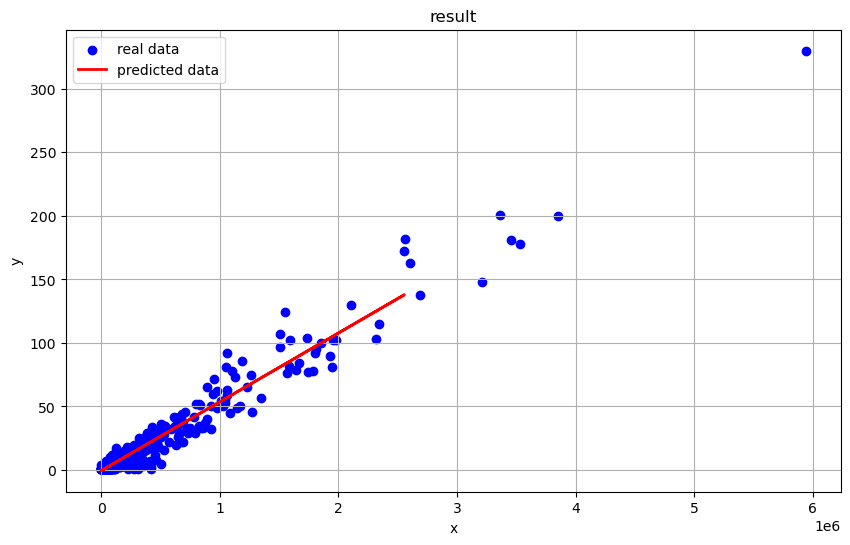

In [88]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad, color='blue', label='real data')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='predicted data')
plt.title('result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
# 모델의 계수와 절편 확인
coef = model.coef_[0][0]  # 모델의 계수 (기울기)
intercept = model.intercept_[0]  # 모델의 절편

# 예측된 선의 식 출력
print(f'예측된 선의 식: y = {coef}x + {intercept:.2f}')

예측된 선의 식: y = 5.418355516608443e-05x + -0.62


# 구매 수가 0인 거 제외 + 표준화